51
100
105
256


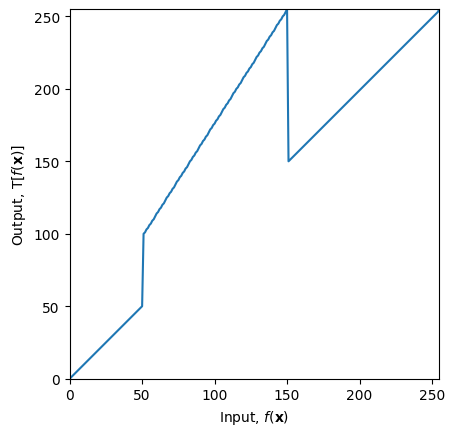

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[3,1], 255, 255 - c[3,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

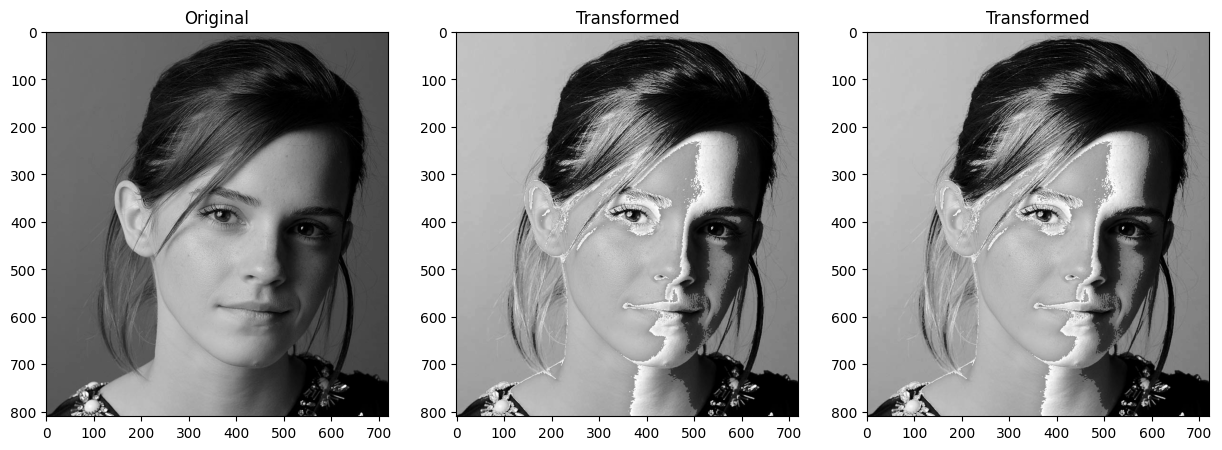

In [11]:
img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)

f = img_orig.copy()
img_trans = cv.LUT(f, transform)
img_trans2 = transform[f]

fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(img_trans, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(img_trans2, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].set_title('Transformed')
ax[2].set_title('Transformed')
plt.show()

201
55
256
[  0   0   0   0 200 201]
201
55
256
[197 198 199 200   0   0]


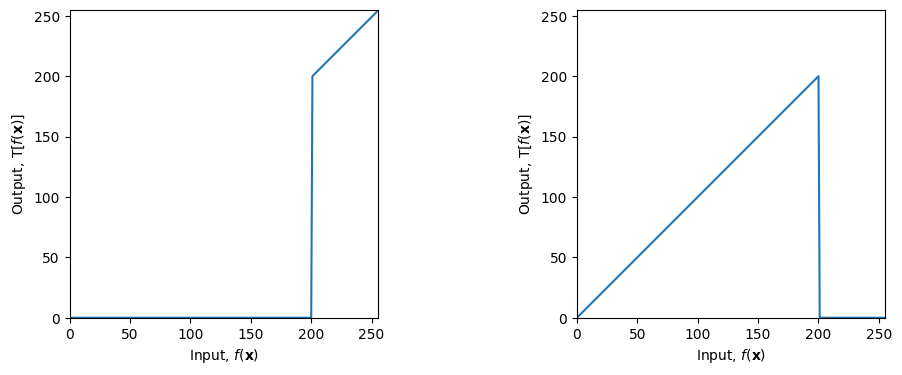

In [37]:
threshold = 200

t1 = np.linspace(0, 0, threshold+1).astype('uint8')
print(len(t1))
t2 = np.linspace(threshold, 255, 255-threshold).astype('uint8')
print(len(t2))

transform_white = np.concatenate((t1, t2), axis=0).astype('uint8')
print(len(transform_white))

print(transform_white[threshold-3:threshold+3])

t1 = np.linspace(0, threshold, threshold+1).astype('uint8')
print(len(t1))
t2 = np.linspace(0, 0, 255-threshold).astype('uint8')
print(len(t2))

transform_gray = np.concatenate((t1, t2), axis=0).astype('uint8')
print(len(transform_gray))

print(transform_gray[threshold-3:threshold+3])

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(transform_white)
ax[1].plot(transform_gray)
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[1].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[1].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
ax[0].set_aspect('equal')
ax[1].set_xlim(0,255)
ax[1].set_ylim(0,255)
ax[1].set_aspect('equal')
plt.show()

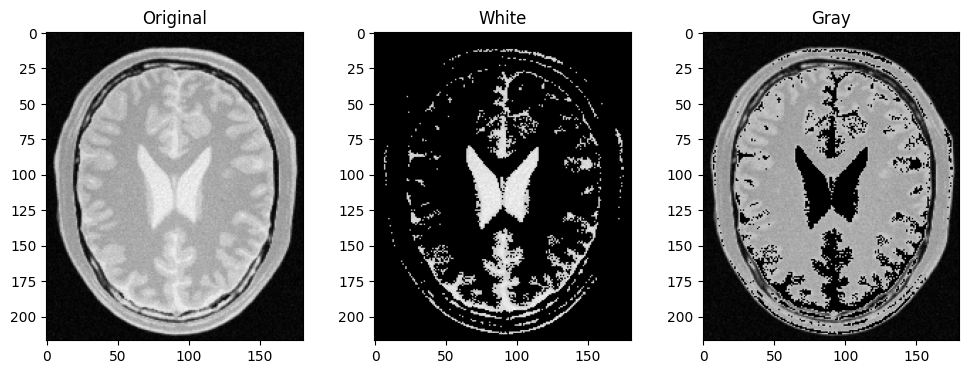

In [38]:
img = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

white_img = cv.LUT(img, transform_white)
gray_img = cv.LUT(img, transform_gray)

fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(white_img, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(gray_img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].set_title('White')
ax[2].set_title('Gray')
plt.show()


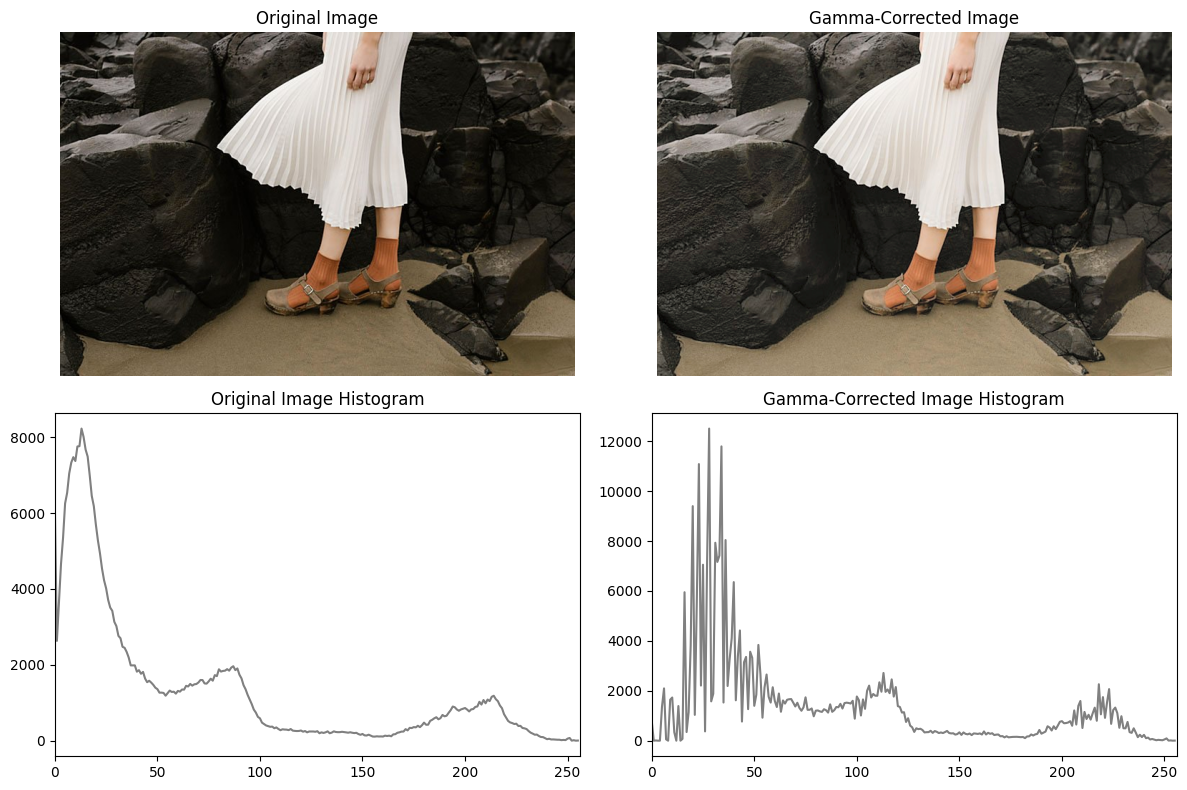

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = 'highlights_and_shadows.jpg'
f = cv.imread(image_path)

image_lab = cv.cvtColor(f, cv.COLOR_BGR2Lab)
L = image_lab[:, :, 0]

gamma = 0.7
t = np.array([(i / 255.0) ** gamma * 255 for i in np.arange(0, 256)]).astype(np.uint8)

L_corrected = cv.LUT(L, t)

image_lab[:, :, 0] = L_corrected
corrected_image = cv.cvtColor(image_lab, cv.COLOR_Lab2BGR)

original_hist = cv.calcHist([f], [0], None, [256], [0, 256])
corrected_hist = cv.calcHist([corrected_image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Gamma-Corrected Image')
plt.imshow(cv.cvtColor(corrected_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Original Image Histogram')
plt.plot(original_hist, color='gray')
plt.xlim([0, 256])

plt.subplot(2, 2, 4)
plt.title('Gamma-Corrected Image Histogram')
plt.plot(corrected_hist, color='gray')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()



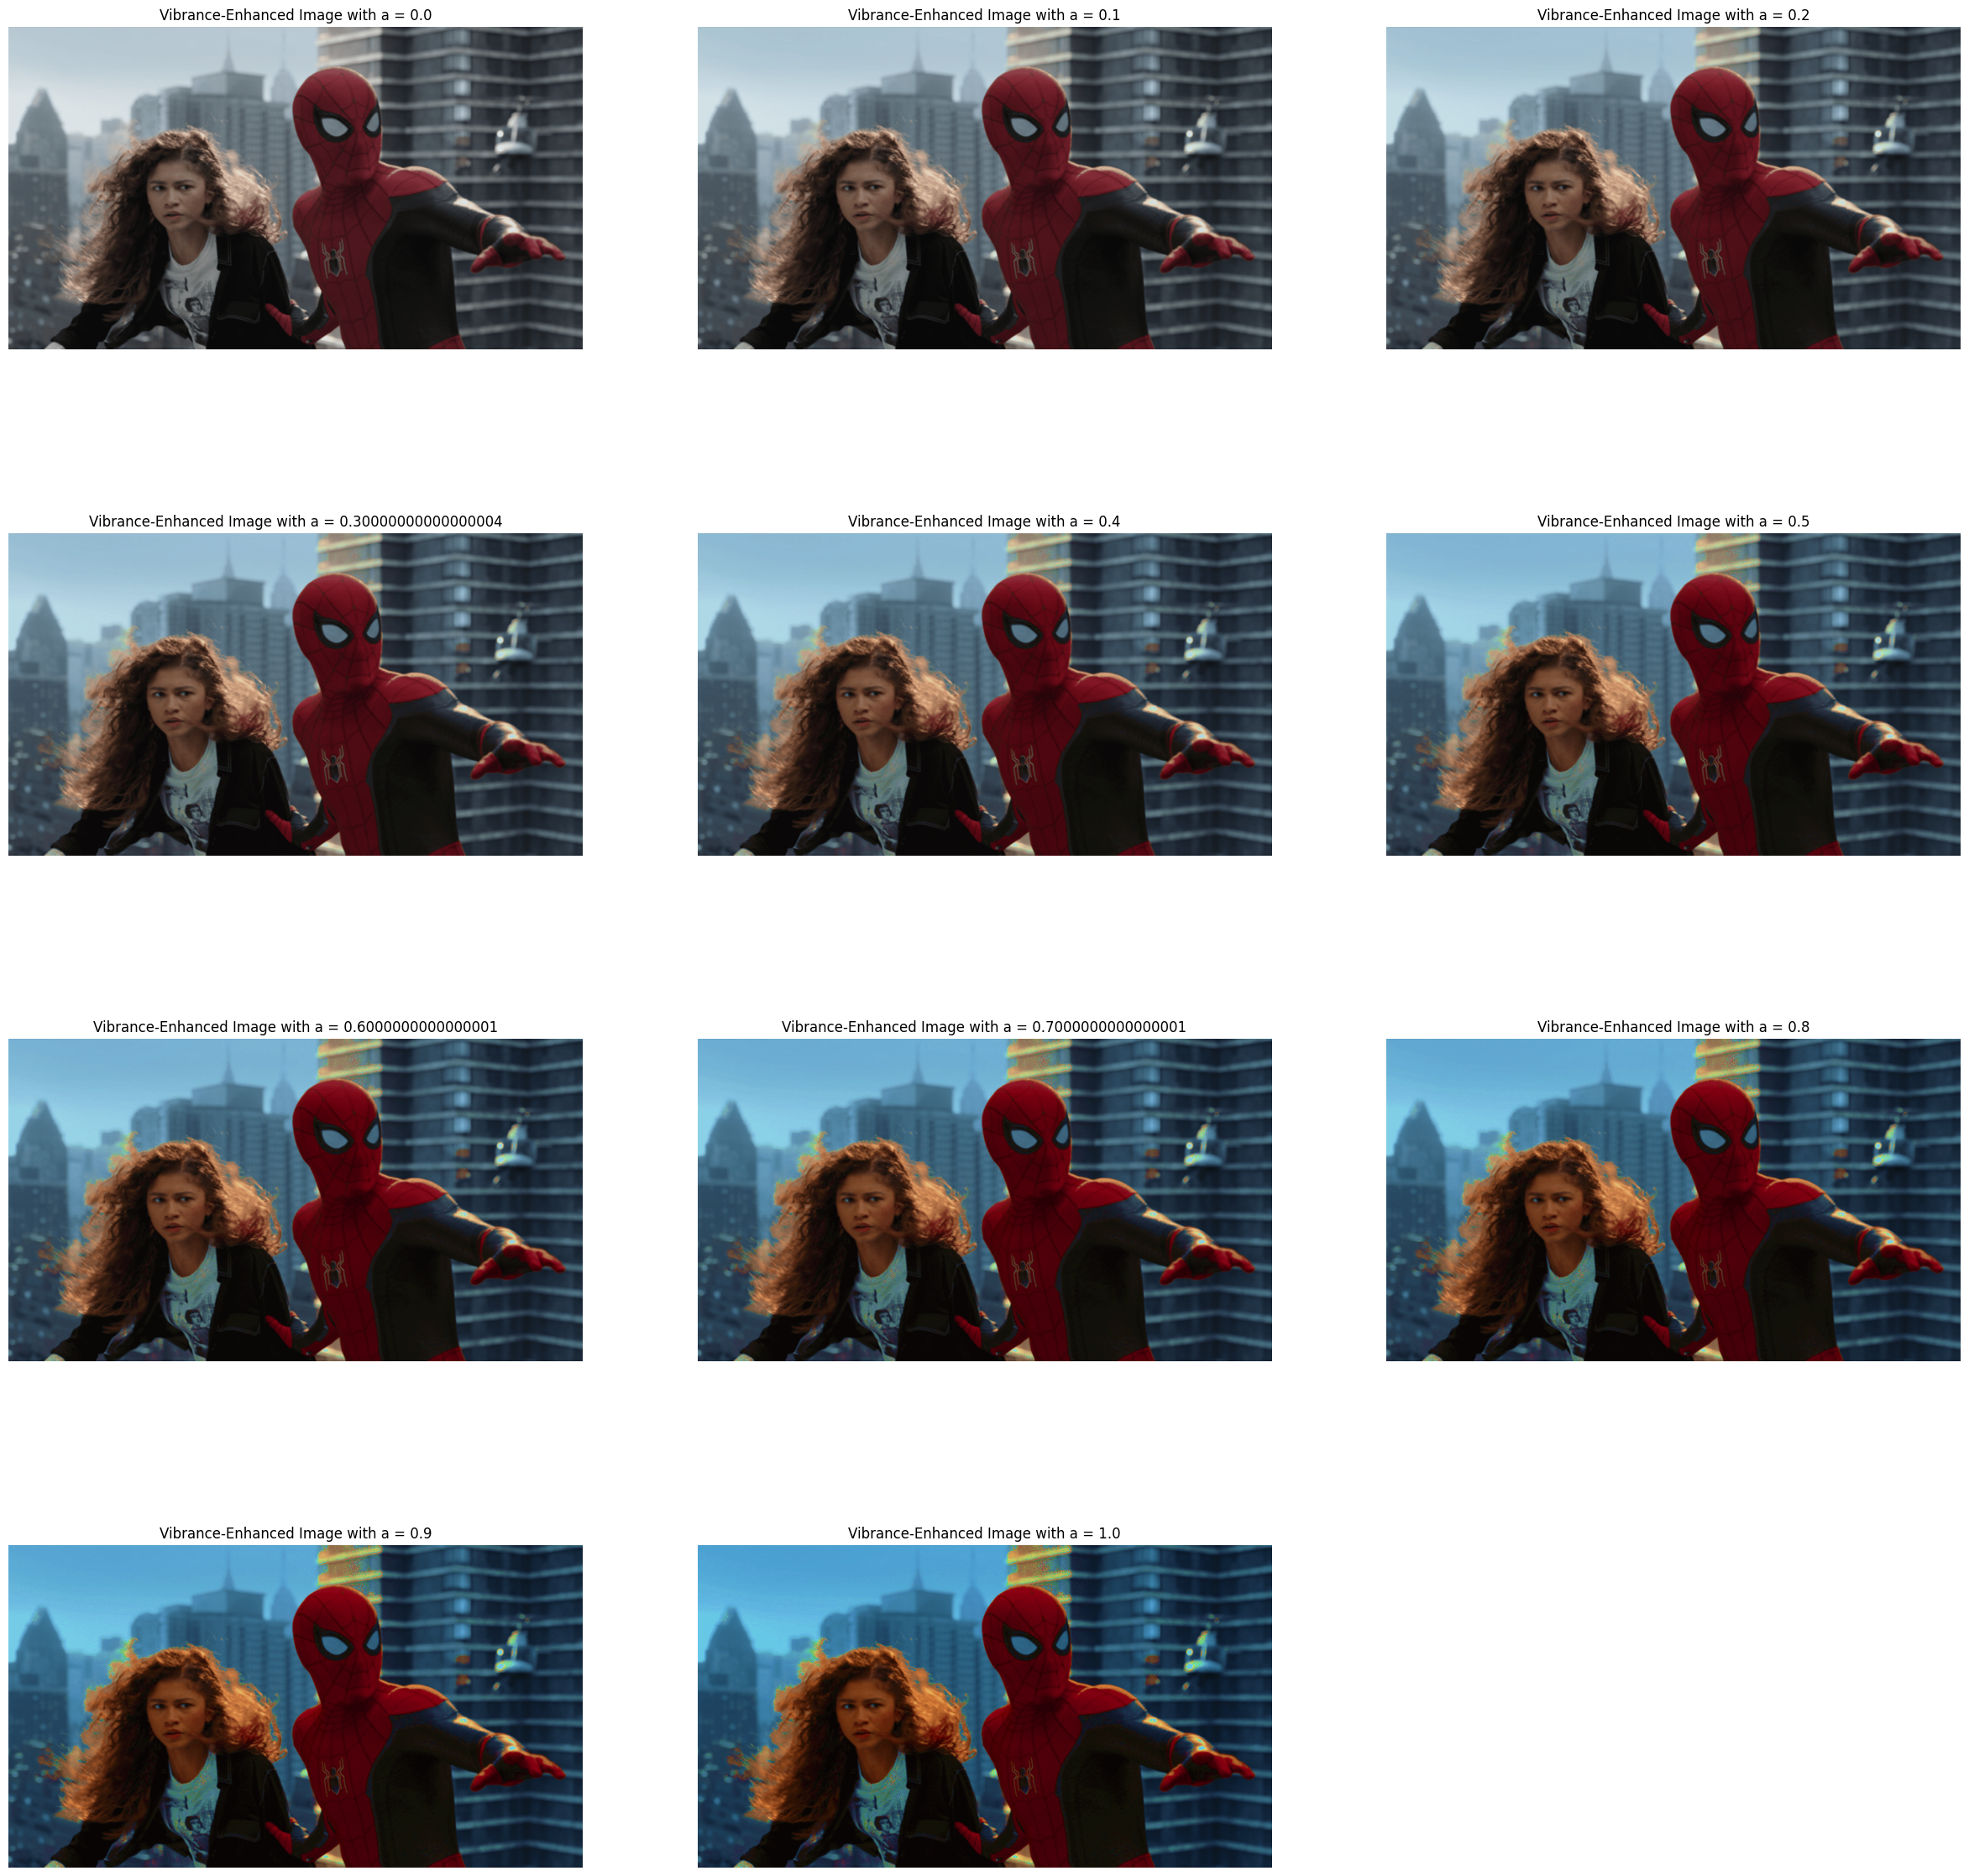

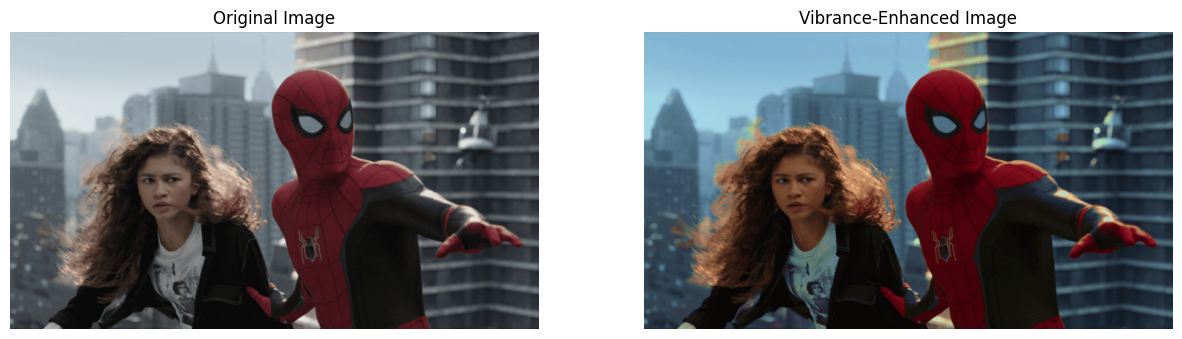

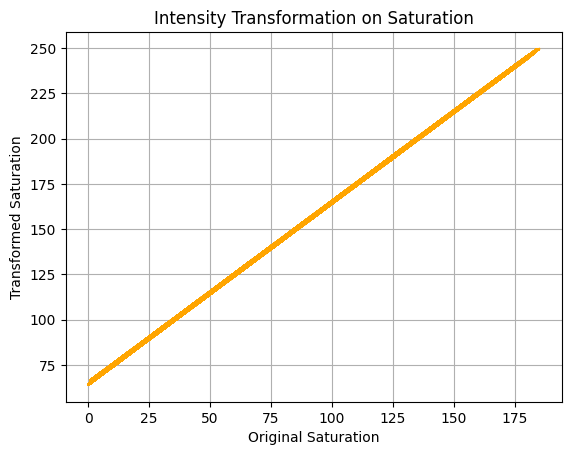

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply intensity transformation
def vibrance_transform(saturation, a, sigma=70):
    transformed = saturation + a * 128 * np.exp(-((saturation - 128) ** 2) / (2 * sigma ** 2))
    return np.clip(transformed, 0, 255)

# Read the image
image = cv2.imread('spider.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_image)

# Apply the intensity transformation to the saturation plane
A = np.linspace(0,1.0,11)

plt.figure(figsize=(30,30))
for i, a in enumerate(A): #Use enumerate to get both index and value
    s_transformed = vibrance_transform(s, a)
    # Recombine the planes
    hsv_transformed = cv2.merge([h, s_transformed.astype(np.uint8), v])
    vibrant_image = cv2.cvtColor(hsv_transformed, cv2.COLOR_HSV2RGB)

    plt.subplot(4, 3, i+1) # Use i (the index) for subplot positioning
    plt.title(f'Vibrance-Enhanced Image with a = {a}') # Use f-string for title formatting
    plt.imshow(vibrant_image)
    plt.axis('off')


# Apply the intensity transformation to the saturation plane
a = 0.5
s_transformed = vibrance_transform(s, a)

# Recombine the planes
hsv_transformed = cv2.merge([h, s_transformed.astype(np.uint8), v])
vibrant_image = cv2.cvtColor(hsv_transformed, cv2.COLOR_HSV2RGB)

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Vibrance-Enhanced Image')
plt.imshow(vibrant_image)
plt.axis('off')

# Plot the original and transformed saturation planes
fig, ax = plt.subplots()
plt.title('Intensity Transformation on Saturation')
plt.plot(s.flatten(), vibrance_transform(s.flatten(), a), color='orange')
plt.xlabel('Original Saturation')
plt.ylabel('Transformed Saturation')
plt.grid()
plt.show()


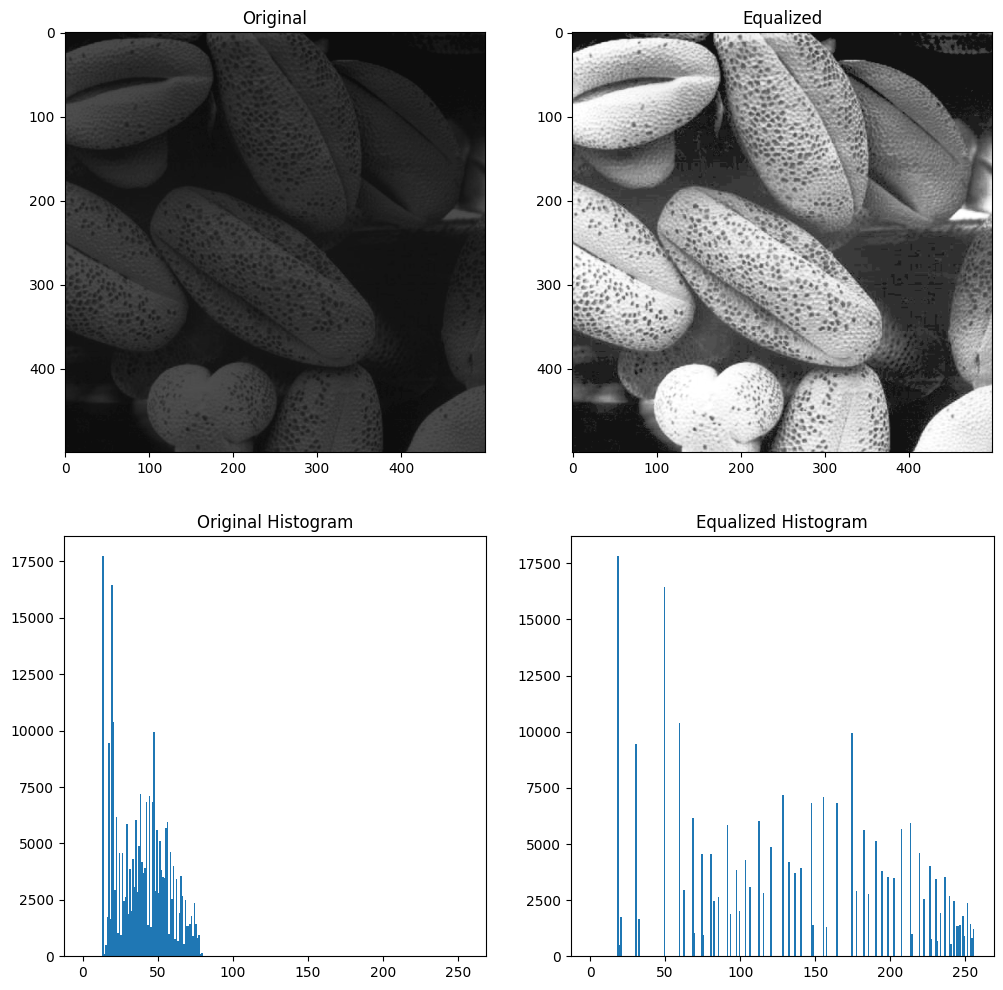

In [77]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def hist_equalizer(image):
  m, n = image.shape
  hist, bins = np.histogram(image.flatten(), 256, [0, 256])
  cdf = hist.cumsum()
  factor = (256-1) / (m*n)
  equalized_hist = np.round(factor * cdf).astype(np.uint8)
  equalized_image = equalized_hist[image]
  return equalized_image

img = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)
equalized_img = hist_equalizer(img)

fig, ax = plt.subplots(2,2, figsize=(12,12))
ax[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0,1].imshow(equalized_img, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('Original')
ax[0,1].set_title('Equalized')
ax[1,0].hist(img.flatten(), 256, [0, 256])
ax[1,1].hist(equalized_img.flatten(), 256, [0, 256])
ax[1,0].set_title('Original Histogram')
ax[1,1].set_title('Equalized Histogram')
plt.show()